# Student Dropout Exploratory Data Analysis

Data Source: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("data.csv", delimiter=";")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
# unneeded since there is a previous qualification that includes the grade
df.drop(columns=["Previous qualification"], inplace=True)

Categorical features must be converted into dummy variables. Also, to properly fit each classification model, the response variable should be encoded to integer values.

In [4]:
categorical_cols = ["Mother\'s qualification", "Father\'s qualification","Mother\'s occupation", "Father\'s occupation",\
                    "Marital status", "Nacionality", "Application mode", "Course", "Gender", "Displaced", "Educational special needs",\
                    "Debtor", "Tuition fees up to date", "Scholarship holder", "International", "Daytime/evening attendance\t"]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded["Target"] = df["Target"].map({"Dropout": 0, "Enrolled": 1, "Graduate": 2})

df_encoded.head()

,Application order,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),...,Course_9853,Course_9991,Gender_1,Displaced_1,Educational special needs_1,Debtor_1,Tuition fees up to date_1,Scholarship holder_1,International_1,Daytime/evening attendance\t_1
0,5,122.0,127.3,20,0,0,0,0,0.000000,0,...,False,False,True,True,False,False,True,False,False,True
1,1,160.0,142.5,19,0,6,6,6,14.000000,0,...,False,False,True,True,False,False,False,False,False,True
2,5,122.0,124.8,19,0,6,0,0,0.000000,0,...,False,False,True,True,False,False,False,False,False,True
3,2,122.0,119.6,20,0,6,8,6,13.428571,0,...,False,False,False,True,False,False,True,False,False,True
4,1,100.0,141.5,45,0,6,9,5,12.333333,0,...,False,False,False,False,False,False,True,False,False,False


## Exploratory Data Analysis

In [5]:
# summary statistics
df_encoded.describe()

,Application order,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.727848,132.613314,126.978119,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,1.178119
std,1.313793,13.188332,14.482001,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.888243
min,0.000000,95.000000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,125.000000,117.900000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,133.100000,126.100000,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,2.000000,140.000000,134.800000,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,2.000000
max,9.000000,190.000000,190.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


In [6]:
# check for nulls
df_encoded.isnull().sum().sum()

0

c:\Users\tydav\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
c:\Users\tydav\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


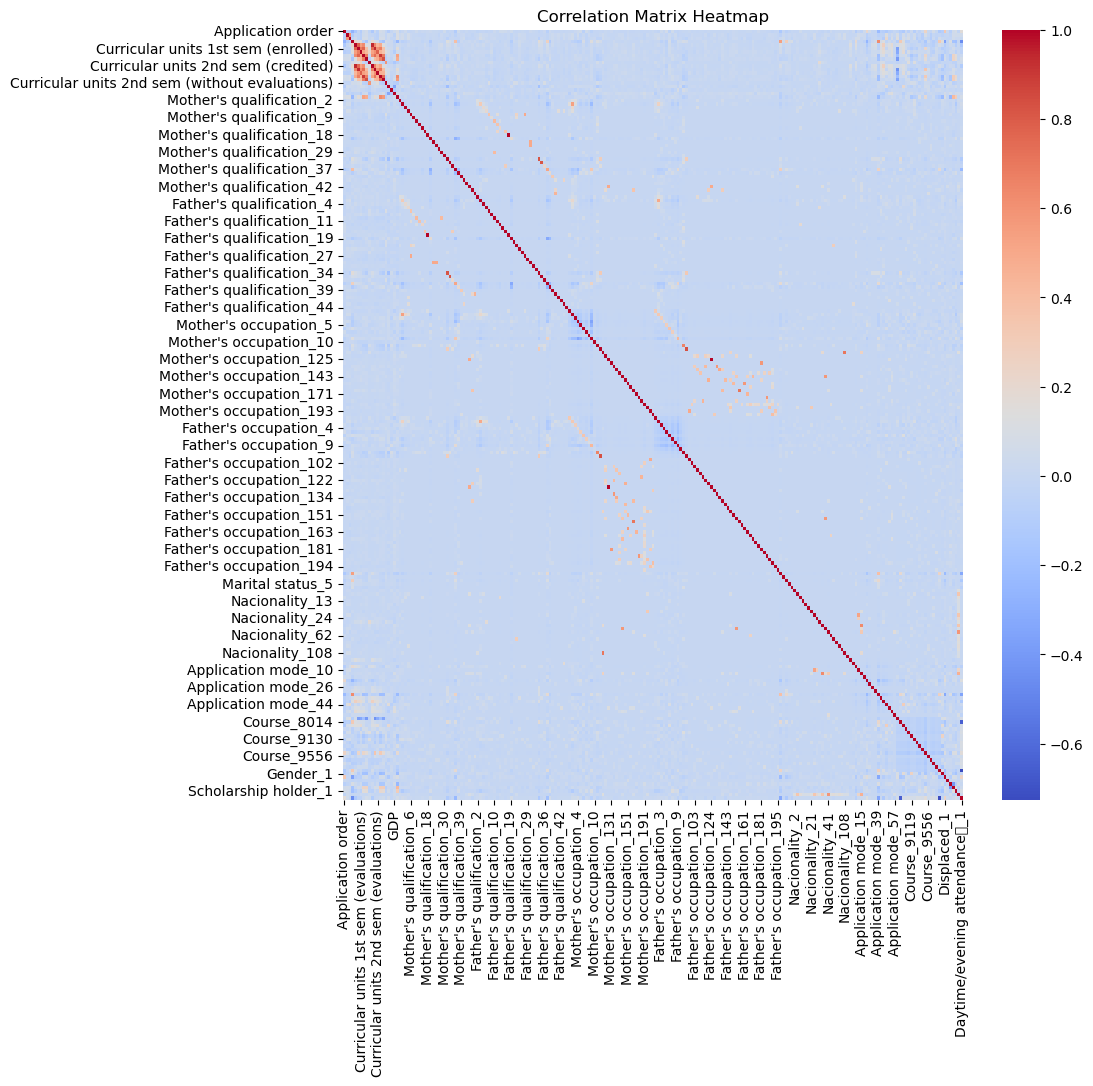

In [7]:
# correlation matrix
corr_matrix = df_encoded.corr()

# initialize matrix
plt.figure(figsize=(10, 10))

# correlation matrix heatmap
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

Having such significant correlations between features indicates the presence of multicollinearity. This will be an issue in the classification models that use all predictors. Feature selection methods help alleviate the issue of multicollinearity.

In [8]:
# correlation matrix
high_corr_pairs = corr_matrix[((corr_matrix > 0.8) | (corr_matrix < -0.8)) & (corr_matrix != 1.0)]

# extract and display the predictor pairs
pairs = [(corr_matrix.index[i], corr_matrix.columns[j], high_corr_pairs.iloc[i, j])  for i in range(len(corr_matrix))\
          for j in range(i + 1, len(corr_matrix)) if not np.isnan(high_corr_pairs.iloc[i, j])]

# results
for pair in pairs:
    print(f"Pair: ({pair[0]}, {pair[1]}), Correlation: {pair[2]}")

Pair: (Curricular units 1st sem (credited), Curricular units 2nd sem (credited)), Correlation: 0.9448110366582713
Pair: (Curricular units 1st sem (enrolled), Curricular units 2nd sem (enrolled)), Correlation: 0.942626693015919
Pair: (Curricular units 1st sem (approved), Curricular units 2nd sem (approved)), Correlation: 0.9040021013038965
Pair: (Curricular units 1st sem (grade), Curricular units 2nd sem (grade)), Correlation: 0.8371697405958258
Pair: (Mother's qualification_34, Father's qualification_34), Correlation: 0.8240058632581724
Pair: (Mother's qualification_35, Father's qualification_35), Correlation: 0.816404253615741
Pair: (Mother's occupation_99, Father's occupation_99), Correlation: 0.8339530332733


In [9]:
# separate into X and y values
X = df_encoded.drop(columns="Target")
y = df_encoded["Target"]

Despite t-stochastic neighborhood embedding (t-SNE) being a non-parametric dimensionality reduction technique, the model relies on euclidean distance to calculate the similarity score. Thus, standardizing the data to ensure that each feature is treated with equal importance. Otherwise, features with a higher variance take over in the t-SNE process.

In the graph of the 2D representation of the data points using t-SNE, there are two noticeable clusters of points. For the most part, the points appear separable, but there is some clear difficulty in distinguishing points in the small cluster of points and the area where the points begin to spread out. There is one point with a drop out label that may be an outlier, but there is already a small number of drop out responses compared to enrolled and graduated together, so I didn't discard it.

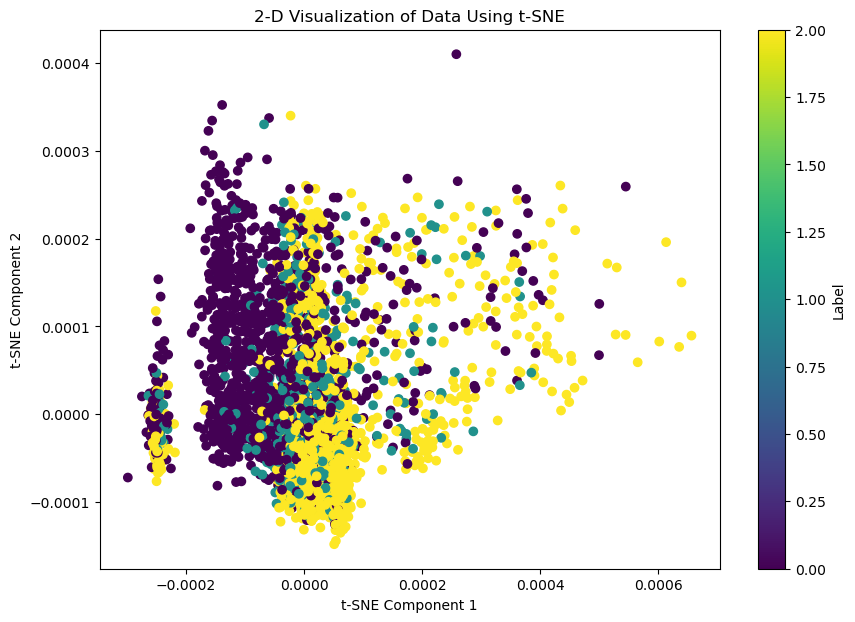

In [10]:
np.random.seed(1) # for reproducibility

# standardize data before t-SNE
X_std = StandardScaler().fit_transform(X)

# t-SNE for 2-D visualization
tsne = TSNE(n_components=2, learning_rate=0.001, max_iter=2000)
X_tsne = tsne.fit_transform(X_std)

# initialize plot
plt.figure(figsize=(10, 7))

# scatter plot
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap="viridis")
plt.colorbar(scatter, label="Label")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("2-D Visualization of Data Using t-SNE")
plt.show()

In [11]:
X.columns

Index(['Application order', 'Previous qualification (grade)',
       'Admission grade', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       ...
       'Course_9853', 'Course_9991', 'Gender_1', 'Displaced_1',
       'Educational special needs_1', 'Debtor_1', 'Tuition fees up to date_1',
       'Scholarship holder_1', 'International_1',
       'Daytime/evening attendance\t_1'],
      dtype='object', length=222)

In [12]:
cont_cols = [c for c in X.columns.to_list() if "_" not in c]
len(cont_cols)

19

The following distributions of the continuous features makes it clear that the data should be normalized, since it is an assumption of logistic regression.

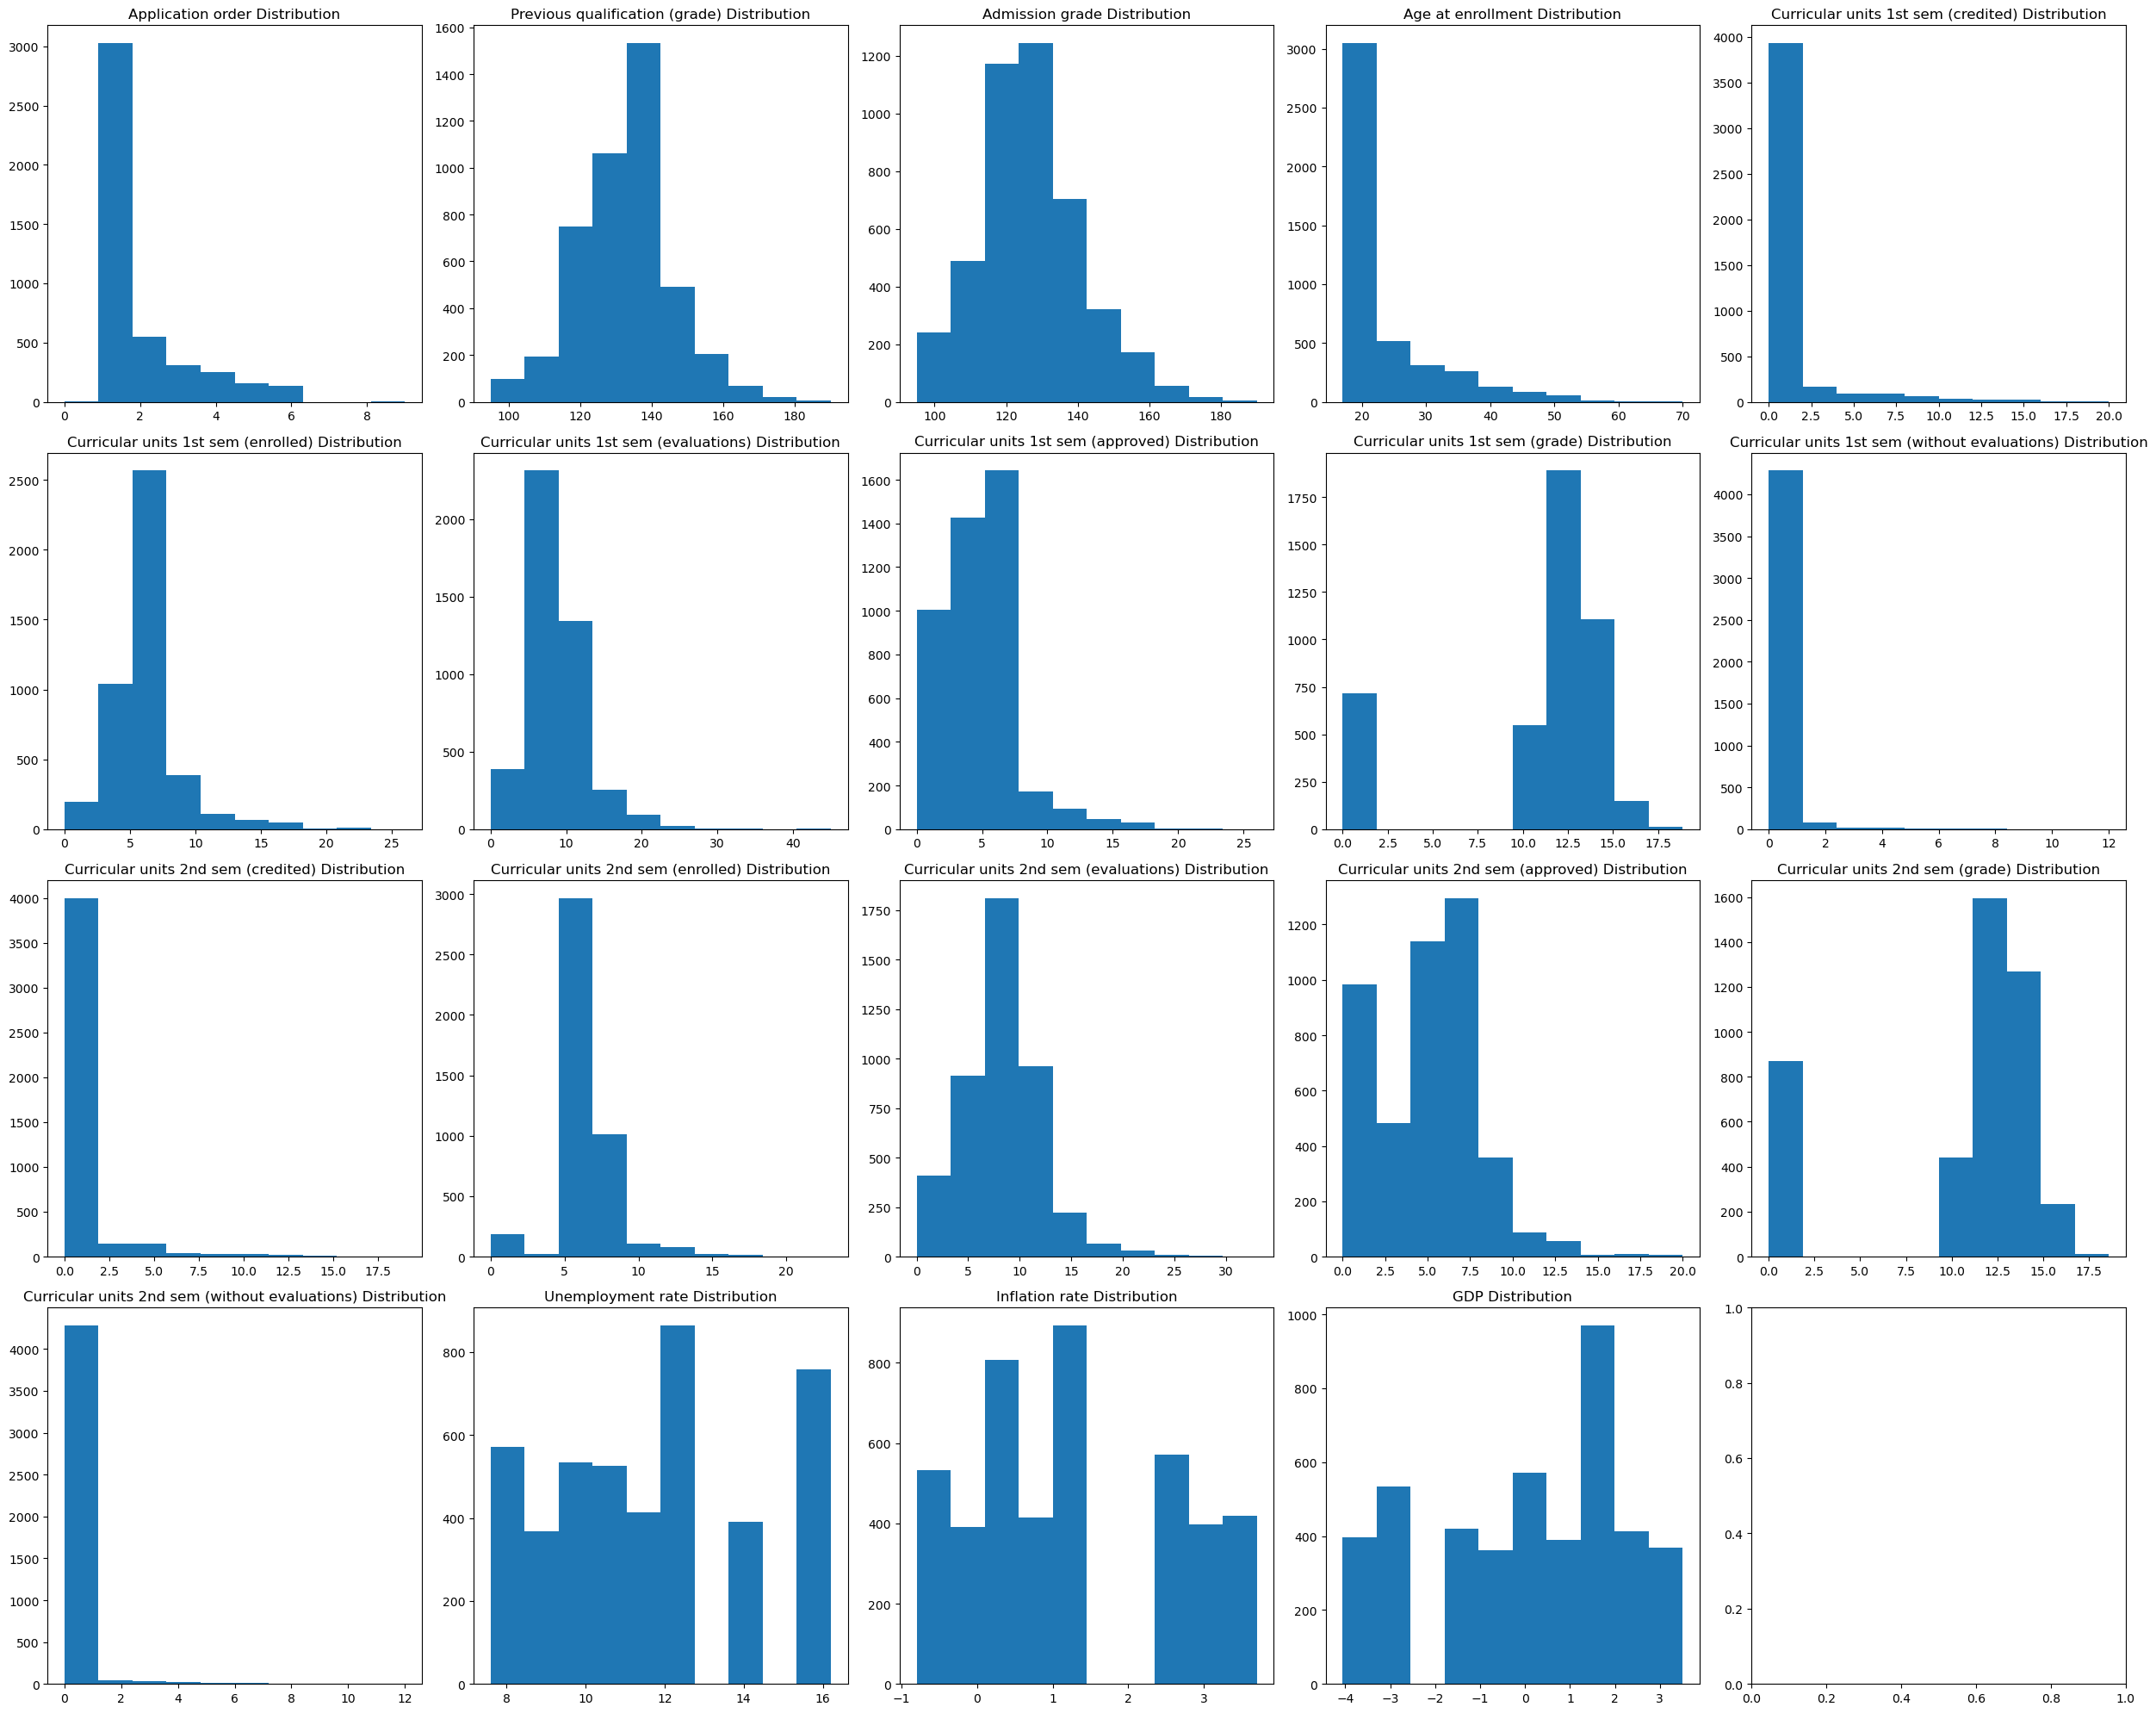

In [13]:
fig, ax = plt.subplots(4, 5, figsize=(25, 20))

for i, col in enumerate(cont_cols):
    ax[i//5, i%5].hist(X.loc[:, col])
    ax[i//5, i%5].set_title(f"{col} Distribution")

plt.tight_layout()
plt.show()

There is a clear imbalance in the response data, which poses a challenge in fitting models because there will be more bias towards predicting "Graduate" (2). Alleviating this will require the re-weighting of responses for the training of the classification models. We see that currently enrolled students are the minority in this data set, while most students have graduated.

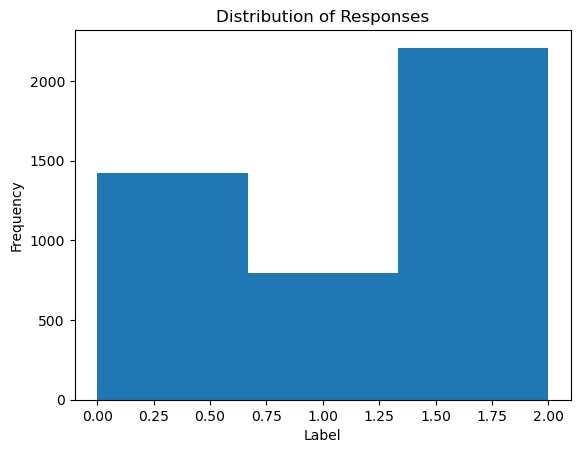

In [14]:
plt.hist(y, bins=3)
plt.title("Distribution of Responses")
plt.ylabel("Frequency")
plt.xlabel("Label")
plt.show()